# Nested Tree Map

A tree map is a hierarchical grouping of items into rectangular shapes. They are tiled to fill the space, and, importantly, the area of each rectangle is proportional to the quantitative value of that category.
Each category (Bed, Bath, etc) is made up of a number of items.

## Two-level Nested Tree Map
extend a baisc tree map  to include the items within each category, like the example below. All text labels should be word wrapped to stay within the boundaries of its respective rectangle.

![example_1](images/example_1.png)

Importantly, the areas of all rectangles should be proportional to its corresponding quantitative value. The area of each top level rectangle represents the sum of its constituent rectangles. Losing this consistency would distort the meaning of the visualization and cause misunderstanding.

In [34]:
!pip install matplotlib squarify


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\HP OMEN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.patheffects as pe


In [36]:
# Load the bbb.csv dataset
data = pd.read_csv('bbb.csv')
data

,category,value
0,Smart home,101.2
1,Smart home,16.3
2,Smart home,134.0
3,Pet,17.9
4,Pet,17.9
...,...,...
157,Baby and kids,17.9
158,Baby and kids,16.1
159,Baby and kids,88.1
160,Baby and kids,15.6


In [37]:
x = 0.
y = 0.
width = 5.
height = 5.

In [38]:

# Extract top-level categories and their total values, and sort by value in descending order
top_categories = data.groupby('category')['value'].sum().reset_index()
top_categories = top_categories.sort_values(by='value', ascending=False)
top_categories


,category,value
11,Kitchen,1063.7
10,Home decor,979.5
7,Furniture,940.6
1,Bath,813.7
8,Health and beauty,808.4
13,Outdoor,781.4
6,Dining,730.4
0,Baby and kids,696.0
4,College,695.9
3,Cleaning and storage,682.8


In [39]:
cat=top_categories.category.unique()
cat

array(['Kitchen', 'Home decor', 'Furniture', 'Bath', 'Health and beauty',
       'Outdoor', 'Dining', 'Baby and kids', 'College',
       'Cleaning and storage', 'Bed', 'Curtains and windows', 'More',
       'Smart home', 'Personalized gifts', 'Pet', 'Holiday'], dtype=object)

In [40]:
top_categories['value']=squarify.normalize_sizes(top_categories['value'], width, height)
bath_color = '#5094c3'
default_color = '#7c4ea6'
bed_color = '#f9c154'
colors = [
    bath_color if category == 'Bath' else (bed_color if category == 'Bed' else default_color)
    for category in top_categories['category']
]

In [41]:
top_categories['category']

11                 Kitchen
10              Home decor
7                Furniture
1                     Bath
8        Health and beauty
13                 Outdoor
6                   Dining
0            Baby and kids
4                  College
3     Cleaning and storage
2                      Bed
5     Curtains and windows
12                    More
16              Smart home
14      Personalized gifts
15                     Pet
9                  Holiday
Name: category, dtype: object

In [42]:
# A function to wrap text to more that one line
import textwrap
def wrap_labels(text,width, break_long_words=False):

        return textwrap.fill(text, width=width,
                      break_long_words=break_long_words)

In [43]:
def wrap(x,rects,df):
    w=rects[df.index.tolist().index(df[df['category']==x].index)]['dx']

    w=int(10*w)
 
    if w==0:w=3
    return wrap_labels(x, w, break_long_words=True) 

In [44]:
# Create a function to plot the tree map of the entities within each category
def plot_nested_tree_map(df, category, color,fig,rect,ax):

    # Filter the data by the category
    df_filtered = df[df["category"] == category]
    
    df_filtered = df_filtered.sort_values(by='value', ascending=False)
    # Get the coordinates of the category rectangle
    x=rect['x']
    dx=rect['dx']
    y=rect['y']
    dy=rect['dy']
    df_filtered['value']=squarify.normalize_sizes(df_filtered['value'], dx, dy)

    # Plot the tree map of the entities without labels within the category rectangle
    squarify.plot(sizes=df_filtered["value"],norm_x=dx,norm_y=dy, color=color, alpha=0.7,pad=False,ax=ax,edgecolor='black',linewidth = 3)
    ax.axis('off')
    
    

In [45]:
rects = squarify.squarify(top_categories["value"], 0, 0, width, height)

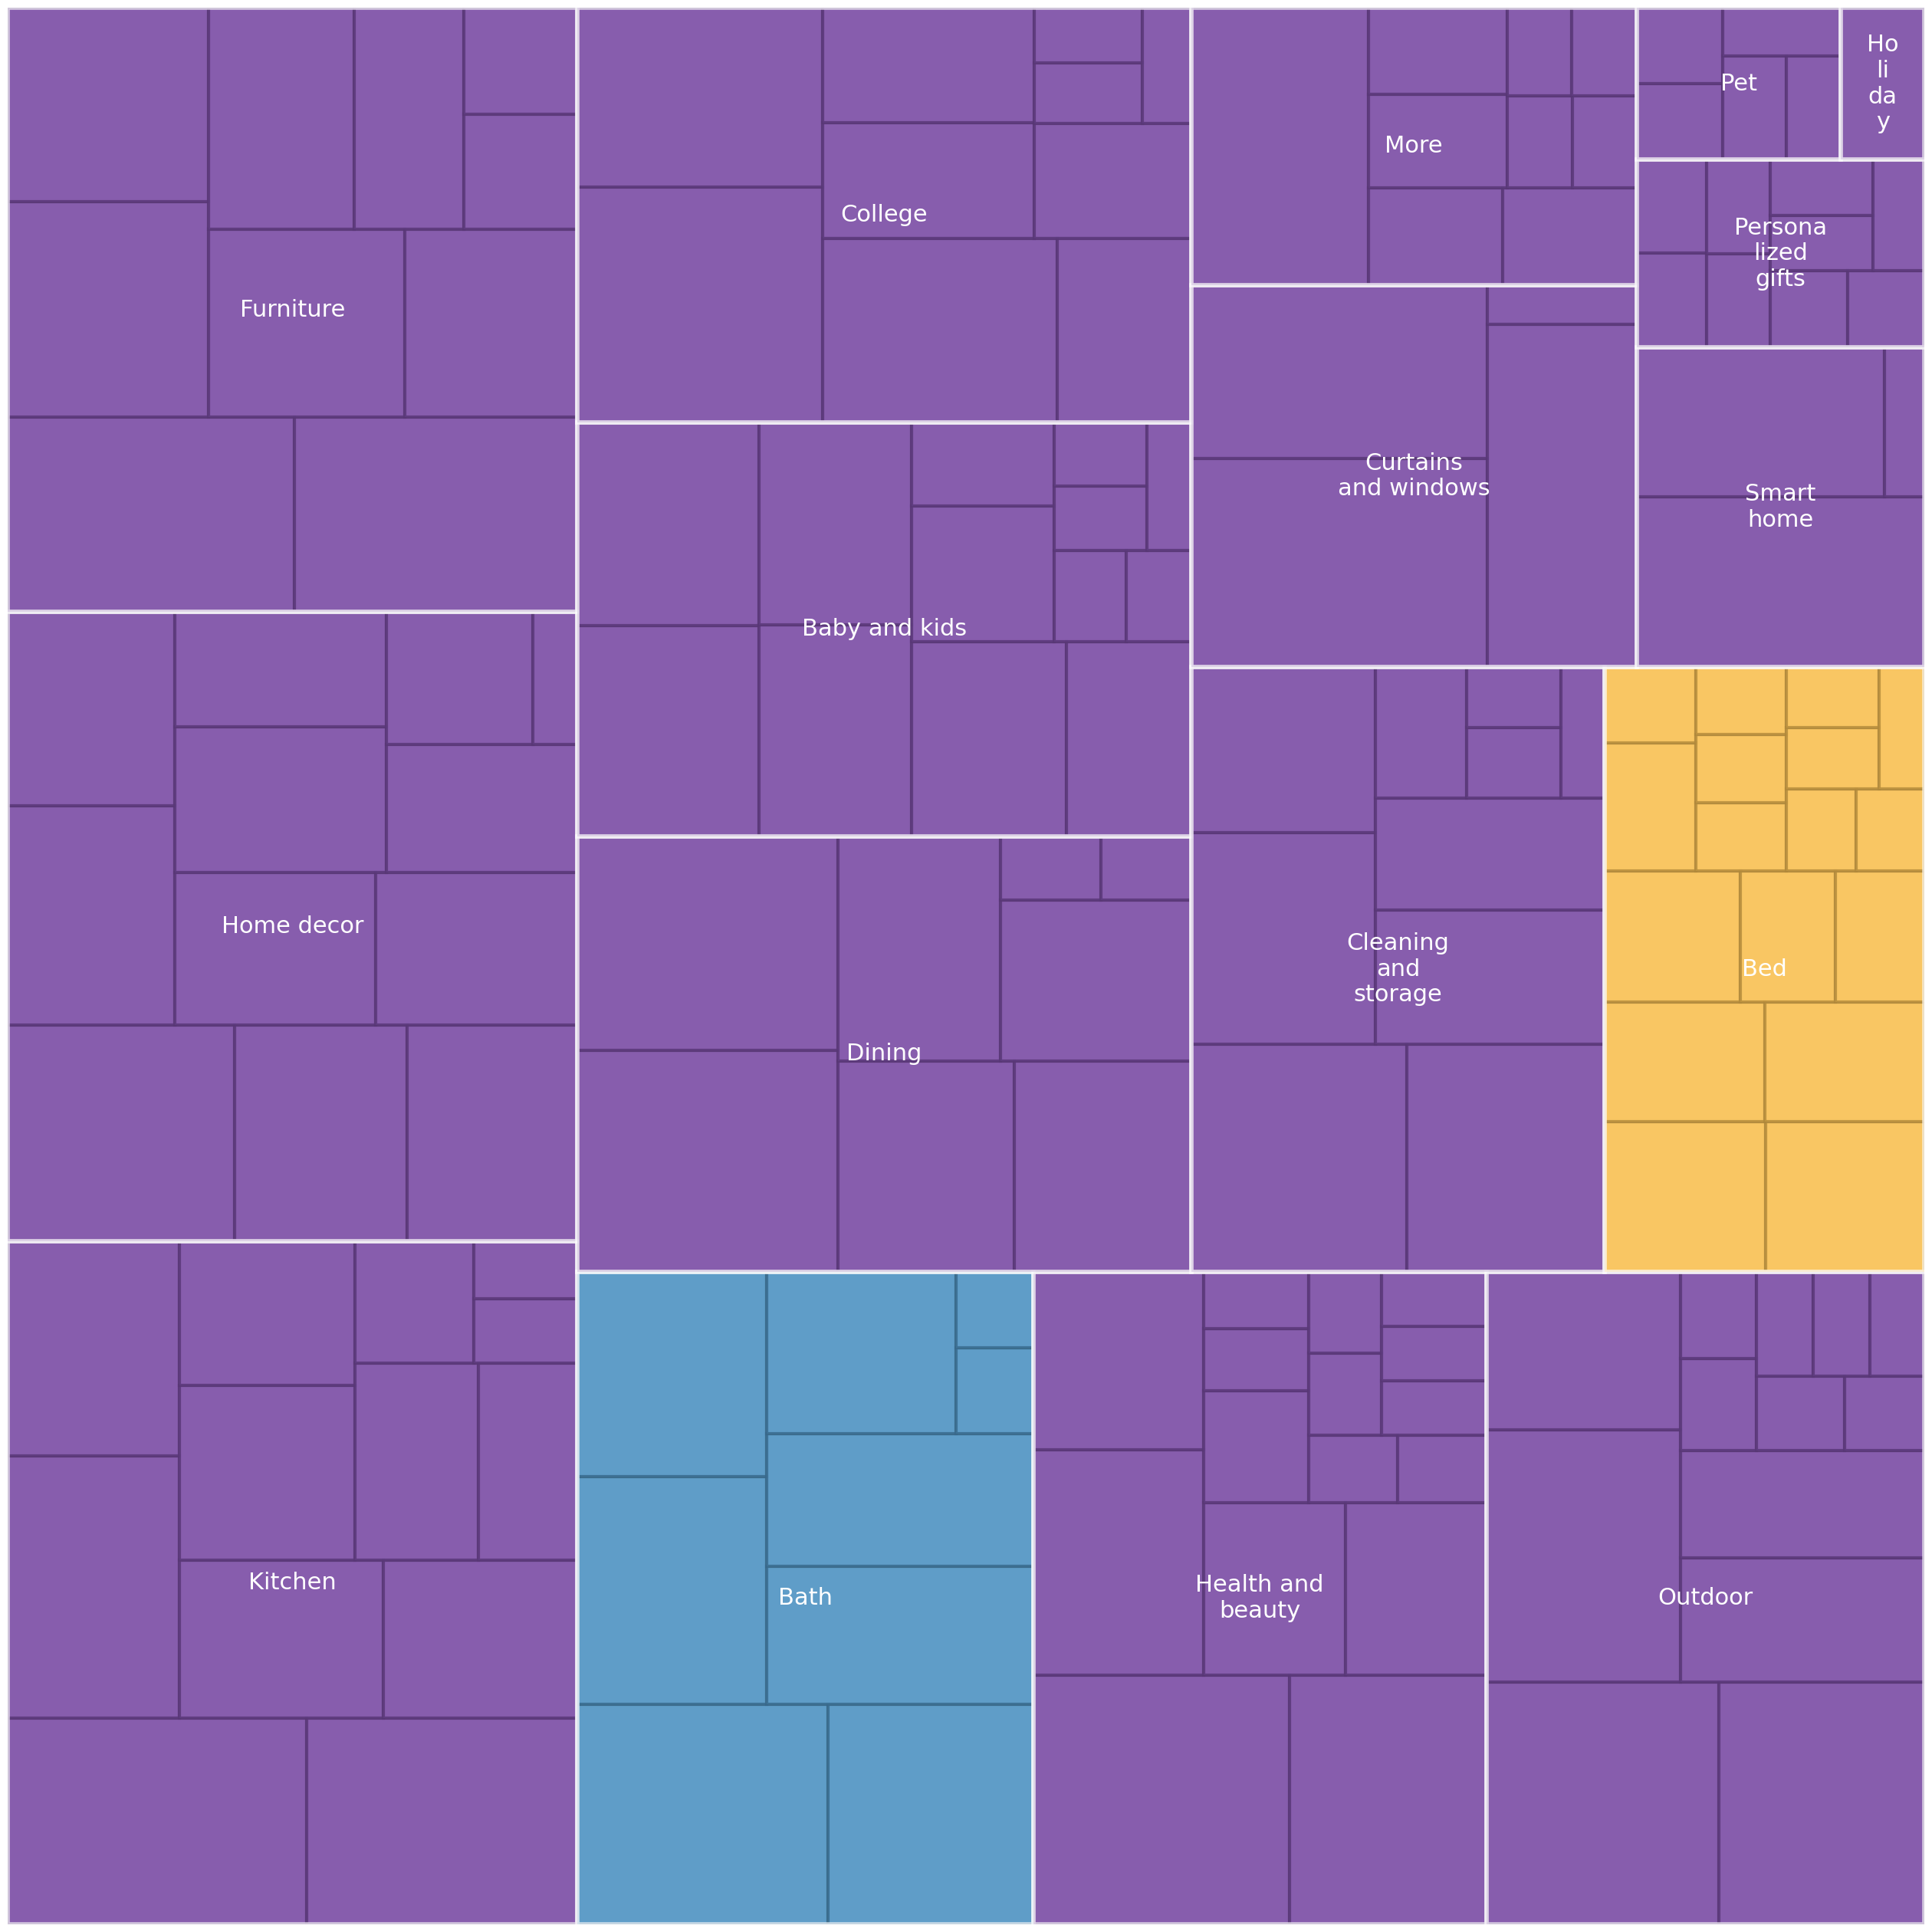

In [46]:

fig=plt.figure(figsize=(width, height))


rects = squarify.squarify(top_categories["value"], 0, 0, width, height)
axes=[fig.add_axes([rect['x'], rect['y'], rect['dx'], rect['dy'], ]) for rect in rects]

labels=top_categories['category'].values
labels=[wrap(i,rects,top_categories) for i in labels]

# Plot the nested tree map of the entities within each category

for i,row in top_categories.iterrows():
    
    category=row[0]
        
    ax=axes[top_categories.index.tolist().index(i)]
    rect=rects[top_categories.index.tolist().index(i)]
    
    plot_nested_tree_map(data, category, colors[top_categories.index.tolist().index(i)],fig,rect,ax)


fig.add_axes([0,0,width,height])
ax=squarify.plot(sizes=top_categories['value'], label=labels,
           color=colors, alpha=0.7, edgecolor='white',linewidth = 4)


plt.axis("off")
plt.rcParams['font.size']=22
plt.rcParams['text.color']='white'


# Show the plot
plt.show()


## Three-level Nested Tree Map

Let's improve our tree map in two further ways. Firstly, the 'Bed' and 'Bath'
categories are intermixed with the other categories. This doesn't make sense. All of the purple rectangles represent a 'Beyond' category and should be placed into a single large rectangle. Let's fix that.

Secondly, the text is difficult to read. Let's reinforce our top-level labelling of Bed, Bath and Beyond, and add a shadowing to the text to help make it visually distinct.

Importantly, again, the areas of all rectangles should be proportional to its corresponding quantitative value. This has not changed from previous versions. Maintaining data integrity is a fundamental requirement of data visualization.

The exact tiling may differ from the example above. However, it should consist of 3 large rectangles, one for Bed, one for Bath and one for Beyond. The Beyond rectangle should be sub-divided into 15 rectangles, one for each category. These are further subdivided by their sub-categories.

All text elements should follow the example above. The 3 top level categories should be a large font size, in bold, and placed in the top left of their respective rectangle. All text should include shadowing. Items within the 'Beyond' rectangle should have their labels in the bottom left. Text should be word wrapped to fit inside its corresponding rectangle (where possible; in my example 'Holiday' cannot fit inside the rectangle, but does fit within the frame of the visualization).

![example_2](images/example_2.png)


In [47]:
Beyond_raw=top_categories[~((top_categories['category'] == 'Bed') | (top_categories['category']=='Bath'))]
Beyond=Beyond_raw.sum()
Beyond['category']='Beyond'
Beyond=pd.DataFrame(Beyond).T
Beyond

,category,value
0,Beyond,21.658534


In [48]:
Beyond_raw=Beyond_raw.reset_index()
Beyond_raw=Beyond_raw.iloc[:,1:]
Beyond_raw

,category,value
0,Kitchen,2.648128
1,Home decor,2.438508
2,Furniture,2.341665
3,Health and beauty,2.012547
4,Outdoor,1.945330
5,Dining,1.818363
6,Baby and kids,1.732723
7,College,1.732474
8,Cleaning and storage,1.699861
9,Curtains and windows,1.157389


In [49]:
BedBath=top_categories[(top_categories['category'] == 'Bed') | (top_categories['category']=='Bath')]
mega_categories=pd.concat([Beyond,BedBath])
mega_categories=mega_categories.sort_values(by='value', ascending=False)
mega_categories=mega_categories.reset_index()
mega_categories=mega_categories.iloc[:,1:]

mega_categories

,category,value
0,Beyond,21.658534
1,Bath,2.025742
2,Bed,1.315724


In [50]:
mega_categories['value']=squarify.normalize_sizes(mega_categories['value'], width, height)

In [51]:
top_categories['value']=squarify.normalize_sizes(top_categories['value'], width, height)
bath_color = '#5094c3'
default_color = '#7c4ea6'
bed_color = '#f9c154'
colors = [
    bath_color if category == 'Bath' else (bed_color if category == 'Bed' else default_color)
    for category in top_categories['category']
]
mega_colors = [
    bath_color if category == 'Bath' else (bed_color if category == 'Bed' else default_color)
    for category in mega_categories['category']
]
beyond_colors = [
    bath_color if category == 'Bath' else (bed_color if category == 'Bed' else default_color)
    for category in Beyond_raw['category']
]

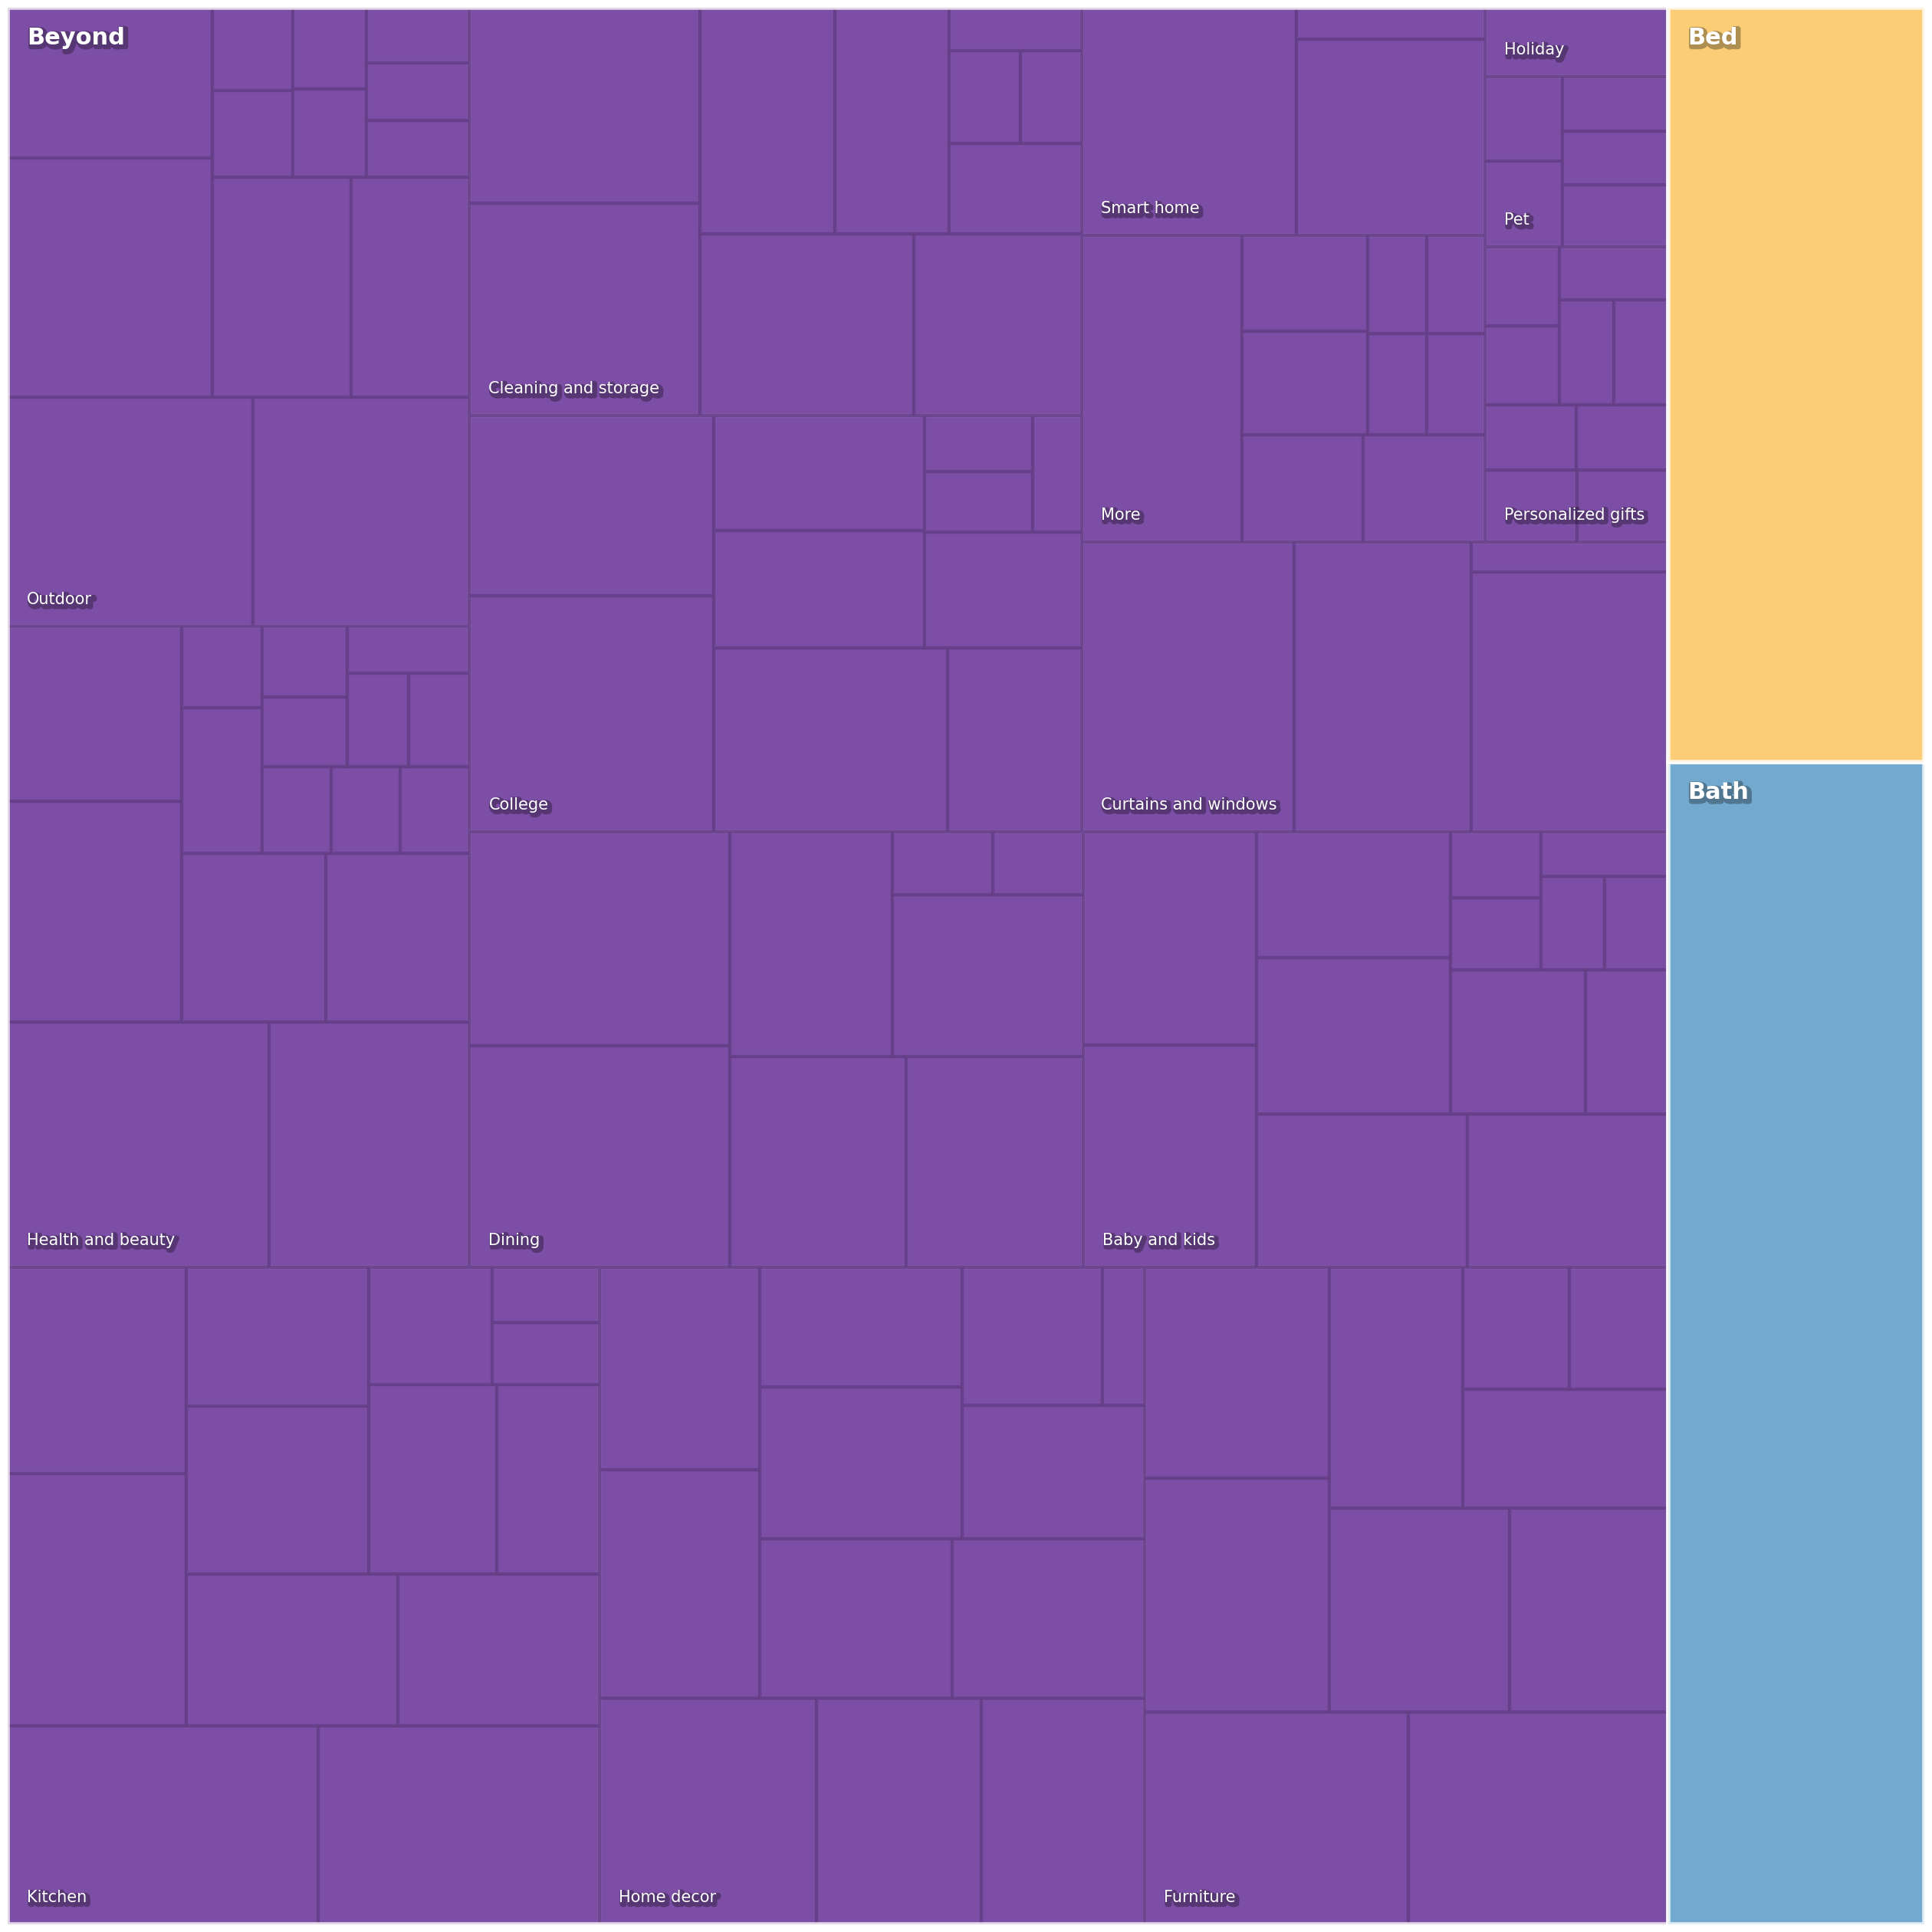

In [54]:

fig=plt.figure(figsize=(width, height))
mega_rects = squarify.squarify(mega_categories["value"], 0, 0, width, height)
mega_axes=[fig.add_axes([rect['x'], rect['y'], rect['dx'], rect['dy'], ]) for rect in mega_rects]
for _ax in mega_axes:
        _ax.set_axis_off()
mega_labels=mega_categories['category'].values
mega_labels=[wrap(i,rects=mega_rects,df=mega_categories) for i in mega_labels]



xs = [rect["x"] for rect in mega_rects]
ys = [rect["y"] for rect in mega_rects]
dxs = [rect["dx"] for rect in mega_rects]
dys = [rect["dy"] for rect in mega_rects]

Beyond_raw['value']=squarify.normalize_sizes(Beyond_raw['value'], dxs[0], dys[0])
beyond_rects = squarify.squarify(Beyond_raw["value"], xs[0], ys[0],dxs[0], dys[0])
beyond_labels=Beyond_raw['category'].values
top_axes=[]
fig.add_axes([xs[0],ys[0],dxs[0],dys[0]])
ax=plt.gca()

_xs = [rect["x"] for rect in beyond_rects]
_ys = [rect["y"] for rect in beyond_rects]
_dxs = [rect["dx"] for rect in beyond_rects]
_dys = [rect["dy"] for rect in beyond_rects]

ax.bar(
    _xs, _dys, width=_dxs, bottom=_ys, color=beyond_colors, label=beyond_labels, align="edge",alpha=1.0,edgecolor='white',linewidth = 4
)
beyond_ax=ax
ax.set_axis_off()




for i,row in Beyond_raw.iterrows():
    category=row[0]
    fig.add_axes([_xs[i],_ys[i],_dxs[i],_dys[i]])
    ax=plt.gca()
    ax.set_axis_off()
    rect=beyond_rects[i]
    
    plot_nested_tree_map(data, category, beyond_colors[i],fig,rect,ax)

fig.add_axes([0,0,width,height])
ax=plt.gca()

ax.bar(
    xs, dys, width=dxs, bottom=ys, color=mega_colors, label=mega_labels, align="edge",alpha=0.8,edgecolor='white',linewidth = 4
)
ax.set_axis_off()


for l, r in zip(mega_labels, mega_rects):
            x, y, dx, dy = r["x"], r["y"], r["dx"], r["dy"]
            ax.text(x+0.05 , y+dy-0.05, l,va='top',fontweight='bold',ha='left',path_effects=[pe.SimpleLineShadow(shadow_color='black',linewidth=5)])

            ax.text(x+0.05 , y+dy-0.05, l,va='top',fontweight='bold',ha='left')
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_axis_off()

for l, r in zip(beyond_labels, beyond_rects):
            x, y, dx, dy = r["x"], r["y"], r["dx"], r["dy"]
            ax.text(x+0.05 , y+0.05, l,va='bottom',ha='left',fontsize="15",path_effects=[pe.SimpleLineShadow(shadow_color='black',linewidth=5)])

            ax.text(x+0.05 , y+0.05, l,va='bottom',ha='left', fontsize="15")
beyond_ax.set_xlim(xs[0], dxs[0])
beyond_ax.set_ylim(ys[0], dys[0])

ax.set_axis_off()
plt.rcParams['font.size']=22
plt.rcParams['text.color']='white'

plt.show()
